# Defi-IA 2022 <a href="https://www.kaggle.com/c/defi-ia-2022/overview"><img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" style="max-width: 70px; display: inline" alt="Python"/></a>
-------------------------------------------------------------

**Predict the accumulated daily rainfall on ground stations**  
*Quentin Douzery, Alexia Ghozland, Dario Moed*

## <font color = 'royalblue'>1 Imports</font>

### 1.1 Packages

In [1]:
##Packages
import time
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV,train_test_split 
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
from sklearn.preprocessing import scale , StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from keras.models import Sequential

from tqdm import tqdm

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

### 1.2 Data

In [3]:
##Données
#coords_path = 'C:/Users/Alexia/Desktop/Other/stations_coordinates.csv' #Perso
#coords_fname  = '/kaggle/input/defi-ia-2022-test/Other/Other/stations_coordinates.csv'

#xtrainS_path = 'C:/Users/Alexia/Desktop/Data/Train/X_station_train.csv' #Perso
#fname = '/kaggle/input/defi-ia-2022-test/Train/Train/X_station_train.csv'

#ytrain_path = 'C:/Users/Alexia/Desktop/Data/Train/Y_train.csv' #Perso
#fname = '/kaggle/input/defi-ia-2022-test/Train/Train/Y_train.csv'

#xtestS_path = 'C:/Users/Alexia/Desktop/Data/Test/X_station_test.csv' #Perso

#bl_obsT_path = 'C:/Users/Alexia/Desktop/Data/Test/Baselines/Baseline_observation_test.csv' #Perso

In [4]:
coords_path = '/home/douzery/Bureau/Defi-IA_Data/Other/stations_coordinates.csv' #INSA
xtrainS_path = '/home/douzery/Bureau/Defi-IA_Data/Train/X_station_train.csv' #INSA
ytrain_path = '/home/douzery/Bureau/Defi-IA_Data/Train/Y_train.csv' #INSA
xtestS_path = '/home/douzery/Bureau/Defi-IA_Data/Test/X_station_test.csv' #INSA
bl_obsT_path = '/home/douzery/Bureau/Defi-IA_Data/Test/Baselines/Baseline_observation_test.csv' #INSA

In [3]:
# ##Données
coords_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Other/stations_coordinates.csv' #Perso
xtrainS_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Train/X_station_train.csv' #Perso
ytrain_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Train/Y_train.csv' #Perso
xtestS_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Test/X_station_test.csv' #Perso
bl_obsT_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Test/Baselines/Baseline_observation_test.csv' #Perso
bl_forecast_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Train/Baselines/Baseline_forecast_train.csv' #Perso
bl_forecastT_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Test/Baselines/Baseline_forecast_test.csv' #Perso

## <font color = 'royalblue'>2 Récupération des données</font>

### 2.0 Fonctions utiles

In [4]:
def Get_NumberSta(id):
    return int(id.split('_')[0])

### 2.1 Coordonnées des stations

In [5]:
##Coords
coords = pd.read_csv(coords_path)
display(coords)
print('Missing Data :', coords.isna().sum().sum(), '\n', 'Shape is :', coords.shape)

,number_sta,lat,lon,height_sta
0,86118001,46.477,0.985,120.0
1,86149001,46.917,0.025,60.0
2,56081003,48.050,-3.660,165.0
3,53215001,47.790,-0.710,63.0
4,22135001,48.550,-3.380,148.0
...,...,...,...,...
320,86137003,47.035,0.098,96.0
321,86165005,46.412,0.841,153.0
322,86273001,46.464,1.042,121.0
323,91200002,48.526,1.993,116.0


Missing Data : 0 
 Shape is : (325, 4)


### 2.2 X_train

In [6]:
##X_train
xtrainS = pd.read_csv(xtrainS_path,parse_dates=['date'],infer_datetime_format=True)
xtrainS['number_sta'] = xtrainS['number_sta'].astype('category')  
display(xtrainS)
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,number_sta,date,ff,t,td,hu,dd,precip,Id
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4
...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22


Missing Data : 6899007 
 Shape is : (4409474, 9)


**Ajout des coordonnées des stations**

In [7]:
xtrainS = xtrainS.merge(coords, how='left', on='number_sta')
display(xtrainS)
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,number_sta,date,ff,t,td,hu,dd,precip,Id,lat,lon,height_sta
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,49.334,-0.431,2.0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,49.334,-0.431,2.0
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,49.334,-0.431,2.0
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,49.334,-0.431,2.0
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,49.334,-0.431,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19,49.108,1.831,126.0
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20,49.108,1.831,126.0
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21,49.108,1.831,126.0
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22,49.108,1.831,126.0


Missing Data : 6899007 
 Shape is : (4409474, 12)


### 2.3 Y_train

In [22]:
#Y_train
ytrain = pd.read_csv(ytrain_path, parse_dates=['date'], infer_datetime_format=True)
ytrain['number_sta'] = ytrain['number_sta'].astype('category')
display(ytrain)
print('Missing Data :', ytrain.isna().sum().sum(), '\n', 'Shape is :', ytrain.shape)

,date,number_sta,Ground_truth,Id
0,2016-01-02,14066001,3.4,14066001_0
1,2016-01-02,14126001,0.5,14126001_0
2,2016-01-02,14137001,3.4,14137001_0
3,2016-01-02,14216001,4.0,14216001_0
4,2016-01-02,14296001,13.3,14296001_0
...,...,...,...,...
183742,2017-12-31,86137003,5.0,86137003_729
183743,2017-12-31,86165005,3.2,86165005_729
183744,2017-12-31,86272002,1.8,86272002_729
183745,2017-12-31,91200002,1.6,91200002_729


Missing Data : 21640 
 Shape is : (183747, 4)


### 2.4 X_test

In [23]:
##X_test
xtestS = pd.read_csv(xtestS_path,infer_datetime_format=True)
display(xtestS)
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,dd,hu,td,t,ff,precip,month,Id
0,NaN,NaN,NaN,278.35,NaN,NaN,12,14047002_277_4
1,NaN,NaN,NaN,278.40,NaN,0.0,12,14047002_277_5
2,NaN,NaN,NaN,279.01,NaN,0.0,12,14047002_277_6
3,NaN,NaN,NaN,279.66,NaN,0.0,12,14047002_277_7
4,NaN,NaN,NaN,279.99,NaN,0.0,12,14047002_277_8
...,...,...,...,...,...,...,...,...
2304797,190.0,82.8,277.00,279.74,10.62,0.0,12,95690001_176_19
2304798,195.0,84.2,277.44,279.93,11.86,0.0,12,95690001_176_20
2304799,199.0,85.7,277.95,280.21,11.77,0.0,12,95690001_176_21
2304800,198.0,85.3,278.25,280.58,10.16,0.0,12,95690001_176_22


Missing Data : 3914287 
 Shape is : (2304802, 8)


**Ajout des coordonnées des stations**

In [24]:
#Create 'number_sta' column
xtestS = xtestS.assign(number_sta=pd.Series(np.zeros(xtestS.shape[0])).values)
xtestS.loc[:,"number_sta"] = xtestS.loc[:,"Id"].apply(Get_NumberSta)

In [25]:
xtestS = xtestS.merge(coords, how='left', on='number_sta')
display(xtestS)
print('Missing Data :', xtestS.isna().sum().sum(), '\n', 'Shape is :', xtestS.shape)

,dd,hu,td,t,ff,precip,month,Id,number_sta,lat,lon,height_sta
0,NaN,NaN,NaN,278.35,NaN,NaN,12,14047002_277_4,14047002,49.275,-0.712,60.0
1,NaN,NaN,NaN,278.40,NaN,0.0,12,14047002_277_5,14047002,49.275,-0.712,60.0
2,NaN,NaN,NaN,279.01,NaN,0.0,12,14047002_277_6,14047002,49.275,-0.712,60.0
3,NaN,NaN,NaN,279.66,NaN,0.0,12,14047002_277_7,14047002,49.275,-0.712,60.0
4,NaN,NaN,NaN,279.99,NaN,0.0,12,14047002_277_8,14047002,49.275,-0.712,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2304797,190.0,82.8,277.00,279.74,10.62,0.0,12,95690001_176_19,95690001,49.108,1.831,126.0
2304798,195.0,84.2,277.44,279.93,11.86,0.0,12,95690001_176_20,95690001,49.108,1.831,126.0
2304799,199.0,85.7,277.95,280.21,11.77,0.0,12,95690001_176_21,95690001,49.108,1.831,126.0
2304800,198.0,85.3,278.25,280.58,10.16,0.0,12,95690001_176_22,95690001,49.108,1.831,126.0


Missing Data : 3914287 
 Shape is : (2304802, 12)


### 2.5 Baseline observations

In [26]:
bl_obsT = pd.read_csv(bl_obsT_path,infer_datetime_format=True)

### 2.6 Baseline forecast

In [10]:
bl_forecast = pd.read_csv(bl_forecast_path, infer_datetime_format=True)
bl_forecastT = pd.read_csv(bl_forecastT_path, infer_datetime_format=True)

## <font color = 'royalblue'>3 Pre-processing</font>

### 3.0 Fonctions utiles

In [14]:
def Get_StationDay(id):
    return id.split('_')[0] + "_" + id.split('_')[1]

In [15]:
def Id_to_int(id):
    return int(id.split('_')[0] + id.split('_')[1] + id.split('_')[2])

In [16]:
def Variable_to_CoSin(df, variable):
    df2 = df.copy()
    
    ##Create features names
    norm_var = "norm_" + variable
    cos_var = "cos_" + variable
    sin_var = "sin_" + variable
    
    ##Normalize values to match with the 0-2π cycle
    df2[norm_var] = (2*np.pi*df2[variable])/df2[variable].max()
    
    ##Create cos and sin features
    df2[cos_var] = np.cos(df2[norm_var])
    df2[sin_var] = np.sin(df2[norm_var])
    
    ##Drop normalized variable
    df2.drop([variable, norm_var], axis=1, inplace=True)
    
    return df2

In [17]:
def Get_Season(month):
    if (month in [1,2,3]):
        season = "Hiver"
    elif (month in [4,5,6]):
        season = "Printemps"
    elif (month in [7,8,9]):
        season = "Ete"
    else:
        season = "Automne"
    
    return season

In [18]:
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

### 3.1 Add 'month' variable

In [19]:
xtrainS['month'] = xtrainS['date'].dt.month
display(xtrainS)
print('Missing Data :', xtrainS.isna().sum().sum(), '\n', 'Shape is :', xtrainS.shape)

,number_sta,date,ff,t,td,hu,dd,precip,Id,lat,lon,height_sta,month
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,49.334,-0.431,2.0,1
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,49.334,-0.431,2.0,1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,49.334,-0.431,2.0,1
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,49.334,-0.431,2.0,1
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,49.334,-0.431,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19,49.108,1.831,126.0,12
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20,49.108,1.831,126.0,12
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21,49.108,1.831,126.0,12
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22,49.108,1.831,126.0,12


Missing Data : 6899007 
 Shape is : (4409474, 13)


### 3.2 Train data

In [27]:
def Preprocess_train (xtrain, ytrain):
    #Copy original df
    xtrain_p = xtrain.copy()
    ytrain_p = ytrain.copy()
    
    #Remove NaNs
    xtrain_p.dropna(inplace=True)
    ytrain_p.dropna(inplace=True)
    
    #Create 'StationDay' column
    xtrain_p = xtrain_p.assign(StationDay=pd.Series(np.zeros(xtrain_p.shape[0])).values)
    xtrain_p.loc[:,"StationDay"] = xtrain_p.loc[:,"Id"].apply(Get_StationDay)
    
    #Drop useless columns
    xtrain_p.drop(['number_sta', 'date', 'Id'], axis=1, inplace=True)
    ytrain_p.drop(['date', 'number_sta'], axis=1, inplace=True)
    
    #Mean on 24 hours (except 'precip')
    xtrain_p = xtrain_p.groupby("StationDay", as_index=False).agg(pd.Series.sum, min_count = 24)
    xtrain_p[['dd', 'hu', 'td', 't', 'ff', 'month',
              'lat', 'lon', 'height_sta']] = xtrain_p[['dd', 'hu', 'td', 't', 'ff', 'month',
                                                       'lat', 'lon', 'height_sta']].divide(24)
    
    #Remove NaNs
    xtrain_p.dropna(inplace=True)
    
    #Keep the same rows in X_train and Y_train
    xtrain_p = xtrain_p.loc[xtrain_p['StationDay'].isin(ytrain_p["Id"])]
    ytrain_p = ytrain_p.loc[ytrain_p['Id'].isin(xtrain_p["StationDay"])]
    
    #Reset index
    xtrain_p.reset_index(drop=True,inplace=True)
    ytrain_p.reset_index(drop=True,inplace=True)
    
    #Sort xtrain
    xtrain_p = xtrain_p.set_index('StationDay')
    xtrain_p = xtrain_p.reindex(index=ytrain_p['Id'])
    xtrain_p = xtrain_p.reset_index()
    
    #Add 'season' variable
    xtrain_p = xtrain_p.assign(season=pd.Series(np.zeros(xtrain_p.shape[0])).values)
    xtrain_p.loc[:,"season"] = xtrain_p.loc[:,'month'].apply(Get_Season)
    
    #Get smooth mean for 'season' variable
    xtrain_p['season'] = calc_smooth_mean(xtrain_p, by='season', on='precip', m=300)
    
    #Get smooth mean for 'month' variable
    #xtrain_p['mean_month'] = calc_smooth_mean(xtrain_p, by='month', on='precip', m=300)
    
    return xtrain_p, ytrain_p

In [28]:
xtrainS_p, ytrain_p = Preprocess_train(xtrainS, ytrain)

**Ajout de la baseline forecast**

In [97]:
xtrainSF_p = xtrainS_p.copy()
xtrainSF_p = xtrainSF_p.merge(bl_forecast, how='left', on='Id')
xtrainSF_p = xtrainSF_p.rename(columns = {'Prediction':'forecast'})
xtrainSF_p.drop(['number_sta', 'date'], axis=1, inplace=True)
xtrainSF_p = xtrainSF_p.fillna(method="backfill")
display(xtrainSF_p)
print('Missing Data :', xtrainSF_p.isna().sum().sum(), '\n', 'Shape is :', xtrainSF_p.shape)

,Id,ff,t,td,hu,dd,precip,lat,lon,height_sta,month,season,forecast
0,14066001_0,3.913750,280.333750,278.514583,88.591667,146.500000,0.2,49.334,-0.431,2.0,1.0,2.618714,5.545129
1,14216001_0,4.759583,280.089583,278.888750,92.187500,158.666667,0.6,48.928,-0.149,155.0,1.0,2.618714,8.490187
2,14372001_0,5.125833,280.076250,278.564167,90.308333,164.625000,0.2,49.102,-0.765,184.0,1.0,2.618714,14.174999
3,14578001_0,4.868750,279.287500,278.418333,94.266667,167.625000,0.8,49.364,0.167,139.0,1.0,2.618714,9.343884
4,14762004_0,3.821250,281.128750,278.964583,86.545833,131.500000,0.0,48.851,-0.899,100.0,1.0,2.618714,16.508696
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82115,86027001_729,8.575000,286.139167,284.755833,91.404167,236.625000,5.9,46.594,0.314,123.0,12.0,1.905192,2.947136
82116,86137003_729,4.028333,286.465417,284.495417,88.025000,221.166667,3.4,47.035,0.098,96.0,12.0,1.905192,6.368405
82117,86165005_729,5.950833,285.988333,284.020833,87.887500,239.291667,5.6,46.412,0.841,153.0,12.0,1.905192,2.460211
82118,91200002_729,4.212500,285.455000,284.124167,91.675000,229.708333,5.6,48.526,1.993,116.0,12.0,1.905192,4.961200


Missing Data : 0 
 Shape is : (82120, 13)


**Create Y_train for classification**

In [102]:
ytrain_c = ytrain_p.copy()
ytrain_c['Ground_truth'][ytrain_c['Ground_truth'] != 0] = 1
display(ytrain_c)
print('Missing Data :', ytrain_c.isna().sum().sum(), '\n', 'Shape is :', ytrain_c.shape)

,Ground_truth,Id
0,1.0,14066001_0
1,1.0,14216001_0
2,1.0,14372001_0
3,1.0,14578001_0
4,1.0,14762004_0
...,...,...
82115,1.0,86027001_729
82116,1.0,86137003_729
82117,1.0,86165005_729
82118,1.0,91200002_729


Missing Data : 0 
 Shape is : (82120, 2)


In [103]:
print(ytrain_c['Ground_truth'].value_counts())

1.0    48536
0.0    33584
Name: Ground_truth, dtype: int64


### 3.3 Test data

In [52]:
def Preprocess_test (xtest, bl_obsT):
    #Copy original df
    xtest_p = xtest.copy()
    
    #Create 'IntId' column
    xtest_p = xtest_p.assign(IntId=pd.Series(np.zeros(xtest_p.shape[0])).values)
    xtest_p.loc[:,"IntId"] = xtest_p.loc[:,"Id"].apply(Id_to_int)
    
    #Sort xtest on 'IntId' values
    xtest_p = xtest_p.sort_values('IntId', ignore_index=True)
    
    #Fill NaNs
    xtest_p = xtest_p.fillna(method="backfill")
    
    #Create 'StationDay' column
    xtest_p = xtest_p.assign(StationDay=pd.Series(np.zeros(xtest_p.shape[0])).values)
    xtest_p.loc[:,"StationDay"] = xtest_p.loc[:,"Id"].apply(Get_StationDay)
    
    #Drop useless variables
    xtest_p.drop(['Id', 'IntId', 'number_sta'], axis=1, inplace=True)

    #Mean on 24 hours (except 'precip')
    xtest_p = xtest_p.groupby("StationDay", as_index=False).agg(pd.Series.sum, min_count = 24)
    xtest_p[['dd', 'hu', 'td', 't', 'ff', 'month',
             'lat', 'lon', 'height_sta']] = xtest_p[['dd', 'hu', 'td', 't', 'ff', 'month',
                                                     'lat', 'lon', 'height_sta']].divide(24)
    
    #Remove NaNs
    xtest_p.dropna(inplace=True)
    
    #Keep the same rows in xtest and ytest
    xtest_p = xtest_p.loc[xtest_p['StationDay'].isin(bl_obsT["Id"])]

    #Reset index
    xtest_p.reset_index(drop=True, inplace=True)
    
    #Sort xtest
    xtest_p = xtest_p.set_index('StationDay')
    xtest_p = xtest_p.reindex(index=bl_obsT['Id'])
    xtest_p = xtest_p.reset_index()
    
    #Rearrange columns order
    xtest_p = xtest_p[['Id', 'ff', 't', 'td', 'hu', 'dd', 'precip', 'lat', 'lon', 'height_sta', 'month']]
    
    #Add 'season' variable
    xtest_p = xtest_p.assign(season=pd.Series(np.zeros(xtest_p.shape[0])).values)
    xtest_p.loc[:,"season"] = xtest_p.loc[:,'month'].apply(Get_Season)
    
    #Get smooth mean for 'season' variable
    xtest_p['season'] = calc_smooth_mean(xtest_p, by='season', on='precip', m=300)
    
    #Get smooth mean for 'month' variable
    #xtest_p['mean_month'] = calc_smooth_mean(xtest_p, by='month', on='precip', m=300)
    
    return xtest_p

In [54]:
xtestS_p = Preprocess_test(xtestS, bl_obsT)

**Ajout de la baseline forecast**

In [106]:
xtestSF_p = xtestS_p.copy()
xtestSF_p = xtestSF_p.merge(bl_forecastT, how='left', on='Id')
xtestSF_p = xtestSF_p.rename(columns = {'Prediction':'forecast'})
xtestSF_p = xtestSF_p.fillna(method="backfill")
display(xtestSF_p)
print('Missing Data :', xtestSF_p.isna().sum().sum(), '\n', 'Shape is :', xtestSF_p.shape)

,Id,ff,t,td,hu,dd,precip,lat,lon,height_sta,month,season,forecast
0,14066001_149,5.237917,282.099583,279.107917,81.720833,224.625000,1.4,49.334,-0.431,2.0,1.0,1.995208,0.436481
1,14126001_149,4.103333,280.895833,279.718750,92.291667,163.166667,1.0,49.145,0.042,125.0,1.0,1.995208,0.001128
2,14137001_149,5.547083,281.167917,278.469583,83.266667,218.458333,0.4,49.180,-0.456,67.0,1.0,1.995208,0.000564
3,14216001_149,2.667083,280.804583,278.105417,83.345833,207.375000,0.8,48.928,-0.149,155.0,1.0,1.995208,0.019174
4,14296001_149,3.254167,279.570417,272.062500,63.250000,191.250000,3.6,48.795,-1.037,336.0,1.0,1.995208,0.015226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85135,86137003_293,1.570833,273.962500,273.602917,97.512500,95.041667,0.2,47.035,0.098,96.0,12.0,3.680229,0.270476
85136,86165005_293,1.492024,275.056667,274.180417,94.500000,83.904762,0.2,46.412,0.841,153.0,12.0,3.680229,0.148497
85137,86273001_293,1.302500,274.948750,281.186667,95.116667,156.416667,0.2,46.464,1.042,121.0,12.0,3.680229,0.170300
85138,91200002_293,0.307917,273.127083,271.929583,92.225000,64.500000,0.2,48.526,1.993,116.0,12.0,3.680229,0.243075


Missing Data : 0 
 Shape is : (85140, 13)


## <font color = 'royalblue'>4 Validation</font>

### 4.1 Metrics

In [57]:
def MAPE(ypred, ytrue):
    aux = abs((ytrue-ypred)/ytrue)
    return 100*aux.mean(axis=0)

In [58]:
def Score_classif(ypred, ytrue):
    aux = abs(ytrue-ypred)
    return 100*(1-aux.mean(axis=0))

### 4.2 Get dummies for 'month'

In [59]:
def Month_dummies(x):
    x_dum = pd.get_dummies(x['month'])
    del x_dum[1]
    x_dum.columns = ['M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09', 'M10', 'M11', 'M12']
    
    return x_dum

### 4.3 Normalization

In [60]:
def Normalization(x_train, x_test):
    #Copy of the original df
    x_train_c = x_train.copy()
    x_test_c = x_test.copy()
    
    #Calcul de la moyenne et de la variance de l'échantillon train
    mean = x_train_c.mean()
    std  = x_train_c.std()
    
    #Normalisation
    x_train_c = (x_train_c - mean) / std
    x_test_c  = (x_test_c  - mean) / std

    return x_train_c, x_test_c

### 4.4 Build models

In [61]:
def Classifier_0(shape, n_layers, n_neurons):
    ##Initialiser modèle
    classifier = keras.models.Sequential(name='Classifier_0')
    
    ##Input layer
    classifier.add(keras.layers.Input(shape))
    
    ##Hidden layers
    for i in range(n_layers):
        classifier.add(keras.layers.Dense(n_neurons, kernel_initializer='uniform', activation='relu'))
        
    ##Output layer
    classifier.add(keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid', name='Output'))
    
    ##Compile model
    classifier.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy'])
    
    return classifier

In [62]:
def Regressor_1(shape, n_layers, n_neurons): 
    ##Initialize model
    regressor = keras.models.Sequential(name='Regressor_1')
   
    ##Input layer
    regressor.add(keras.layers.Input(shape))
    
    ##Hidden layers
    for i in range(n_layers): 
        regressor.add(keras.layers.Dense(n_neurons, activation='relu'))
   
    ##Output layer
    regressor.add(keras.layers.Dense(1, name='Output'))
    
    ##Compile model
    regressor.compile(optimizer = 'adam',
                      loss      = 'mae',
                      metrics = ['accuracy'])
    
    return regressor

In [63]:
def Classifier_Regressor(xtrain, ytrain, xtest, ytest,
                         n_layers_c, n_neurons_c, n_layers_r, n_neurons_r,
                         epochs_c, batch_size_c, epochs_r, batch_size_r):
    
    ##Create ytrain for classif
    ytrain_c = ytrain.copy()
    ytrain_c['Ground_truth'][ytrain_c['Ground_truth'] != 0] = 1
    
    ##Create ytrain for regression
    ytrain_r = ytrain.copy()
    ytrain_r = ytrain_r[ytrain_r['Ground_truth'] > 0]
    
    ##Get 'month' dummies
    #xtrain_Dum = Month_dummies(xtrain)
    #xtest_Dum = Month_dummies(xtest)
    
    ##Get 'CoSin month'
    xtrain_CoSinMonth = Variable_to_CoSin(pd.DataFrame(xtrain['month']), "month")
    xtest_CoSinMonth = Variable_to_CoSin(pd.DataFrame(xtest['month']), "month")
    
    ##Normalization
    xtrain_N, xtest_N = Normalization(xtrain, xtest)
    
    ##Drop 'month' variable
    xtrain_N.drop(['month'], axis=1, inplace=True)
    xtest_N.drop(['month'], axis=1, inplace=True)
    
    ##Add 'month' dummies
    #xtrain_N = pd.concat([xtrain_N, xtrain_Dum], axis=1)
    #xtest_N = pd.concat([xtest_N, xtest_Dum], axis=1)
    
    ##Add 'CoSin month'
    xtrain_N = pd.concat([xtrain_N, xtrain_CoSinMonth], axis=1)
    xtest_N = pd.concat([xtest_N, xtest_CoSinMonth], axis=1)
    
    ##Train Classifier
    n_variables_c = xtrain_N.shape[1]
    classifier = Classifier_0(n_variables_c, n_layers_c, n_neurons_c)
    history_c = classifier.fit(xtrain_N, ytrain_c, batch_size_c, epochs_c, verbose=0)
    
    ##Create xtrain for regression
    xtrain_N_r = xtrain_N[xtrain_N.index.isin(ytrain_r.index)]
    xtrain_N_r.reset_index(drop=True, inplace=True)
    ytrain_r.reset_index(drop=True, inplace=True)
    
    ##Train regressor
    n_variables_r = xtrain_N_r.shape[1]
    regressor = Regressor_1(n_variables_r, n_layers_r, n_neurons_r)
    history_r = regressor.fit(xtrain_N_r, ytrain_r, batch_size_r, epochs_r, verbose=0)
    
    ##Predict 'rain or not'
    ypred_c = classifier.predict(xtest_N)
    ypred_c = (ypred_c > 0.5).astype(int)
    ypred_c = pd.DataFrame(ypred_c, columns=['Rain'])
    
    norain = ypred_c[ypred_c['Rain'] == 0]
    rain = ypred_c[ypred_c['Rain'] == 1]
    
    ##Set 'no rain' predictions
    ypred = ytest.copy()
    ypred.loc[ypred.index.isin(norain.index), 'Ground_truth'] = 0
    
    ##Preprocessing for regressor predictions
    xtest_N_r = xtest_N[xtest_N.index.isin(rain.index)]
    
    ##Regressor predictions
    ypred_r = regressor.predict(xtest_N_r)
    ypred_r = ypred_r.flatten()
    
    ##Set 'rain' predictions
    ypred.loc[ypred.index.isin(rain.index), 'Ground_truth'] = ypred_r
    
    return ypred

### 4.5 Sampling

In [64]:
def Create_samples (xtrain, ytrain):
    ##Copy original df
    xtrain_c = xtrain.copy()
    ytrain_c = ytrain.copy()
    
    #Split X validation/train
    xtrain_v = xtrain_c.sample(frac=0.20, axis=0)
    xtrain_t = xtrain_c.drop(xtrain_v.index)
    
    ##Split Y validation/train
    ytrain_v = ytrain_c.loc[ytrain_c['Id'].isin(xtrain_v['Id'])]
    ytrain_t = ytrain_c.drop(ytrain_v.index)
    
    ##Reset index
    xtrain_t.reset_index(drop=True, inplace=True)
    xtrain_v.reset_index(drop=True, inplace=True)
    ytrain_t.reset_index(drop=True, inplace=True)
    ytrain_v.reset_index(drop=True, inplace=True)
    
    ##Sort X
    xtrain_t = xtrain_t.set_index('Id')
    xtrain_t = xtrain_t.reindex(index=ytrain_t['Id'])
    xtrain_t = xtrain_t.reset_index()
    
    xtrain_v = xtrain_v.set_index('Id')
    xtrain_v = xtrain_v.reindex(index=ytrain_v['Id'])
    xtrain_v = xtrain_v.reset_index()
    
    ##Drop useless variables
    xtrain_t.drop(['Id'], axis=1, inplace=True)
    xtrain_v.drop(['Id'], axis=1, inplace=True)
    ytrain_t.drop(['Id'], axis=1, inplace=True)
    ytrain_v.drop(['Id'], axis=1, inplace=True)
    
    return xtrain_t, xtrain_v, ytrain_t, ytrain_v

### 4.6 K-fold validation (classifier)

In [ ]:
K = 1
ACCURACY = np.zeros(K)

batch_size = 100
epochs = 10 #20
n_layers = 10 #10
n_neurons = 32 #64

for k in tqdm(range(K)):
    ##Create samples
    xtrain_t, xtrain_v, ytrain_t, ytrain_v = Create_samples(xtrainS_p, ytrain_p)
    
    ##Dummies dataframes for "month" before normalization
    xtrain_t_Dum = Month_dummies(xtrain_t)
    xtrain_v_Dum = Month_dummies(xtrain_v)
    
    ##Normalization
    xtrain_t_N, xtrain_v_N = Normalization(xtrain_t, xtrain_v)
    
    ##Drop 'month' variable
    xtrain_t_N.drop(['month'], axis=1, inplace=True)
    xtrain_v_N.drop(['month'], axis=1, inplace=True)
    
    ##Concatenation after normalization: dummies + original df
    xtrain_t_N = pd.concat([xtrain_t_N, xtrain_t_Dum], axis=1)
    xtrain_v_N = pd.concat([xtrain_v_N, xtrain_v_Dum], axis=1)

    ##Build model
    nb_variables = xtrain_t_N.shape[1]
    classifier = Classifier_0(nb_variables, n_layers, n_neurons)
    
    ##Training
    history = classifier.fit(xtrain_t_N, ytrain_t, batch_size, epochs, verbose=0)
    
    ##Prediction
    ypred = classifier.predict(xtrain_v_N)
    ypred = (ypred > 0.5).astype(int)
    ypred = pd.DataFrame(ypred, columns=['Prediction'])
    
    ##Evaluate score
    ACCURACY[k] = Score_classif(ypred['Prediction'], ytrain_v['Ground_truth'])

In [ ]:
print("Mean Accuracy :", np.mean(ACCURACY))
plt.boxplot(ACCURACY)
plt.ylabel("Accuracy")
plt.show()

### 4.7 K-fold validation (classifier_regressor)

In [98]:
K = 10
MAPE_ = np.zeros(K)

##Model parameters
n_layers_c = 10
n_neurons_c = 64
n_layers_r = 20
n_neurons_r = 32

##Training parameters
batch_size_c = 100
epochs_c = 20
batch_size_r = 100
epochs_r = 20

for k in tqdm(range(K)):
    ##Create samples
    xtrain_t, xtrain_v, ytrain_t, ytrain_v = Create_samples(xtrainSF_p, ytrain_p)
    
    ##Apply model
    ypred = Classifier_Regressor(xtrain_t, ytrain_t, xtrain_v, ytrain_v,
                                 n_layers_c, n_neurons_c, n_layers_r, n_neurons_r,
                                 epochs_c, batch_size_c, epochs_r, batch_size_r)
    
    ##Post-processing
    ypred.rename(columns={'Ground_truth':'Prediction'}, inplace=True)
    ypred.loc[:,'Prediction'] = ypred.loc[:,'Prediction'] + 1
    ytrain_v.loc[:,'Ground_truth'] = ytrain_v.loc[:,'Ground_truth'] + 1
    
    ##Compute MAPE
    MAPE_[k] = MAPE(ypred['Prediction'], ytrain_v['Ground_truth'])

100%|██████████| 10/10 [08:28<00:00, 50.83s/it]


Mean MAPE : 33.97707105311776


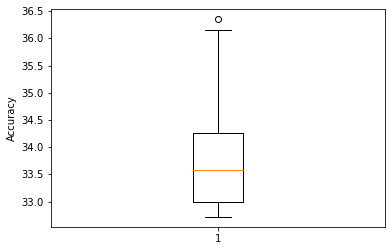

In [99]:
print("Mean MAPE :", np.mean(MAPE_))
plt.boxplot(MAPE_)
plt.ylabel("Accuracy")
plt.show()

## <font color = 'royalblue'>5 Training</font>

### 5.1 Pre-processing (1)

In [100]:
xtrainSF_p.drop(['Id'], axis=1, inplace=True)

In [104]:
ytrain_c.drop(['Id'], axis=1, inplace=True)

In [107]:
xtestSF_p.drop(['Id'], axis=1, inplace=True)

In [ ]:
#xtrainS_Dum = Month_dummies(xtrainS_p)
#xtestS_Dum = Month_dummies(xtestS_p)

In [108]:
xtrain_CoSinMonth = Variable_to_CoSin(pd.DataFrame(xtrainSF_p['month']), "month")
xtest_CoSinMonth = Variable_to_CoSin(pd.DataFrame(xtestSF_p['month']), "month")

In [109]:
xtrainSF_N, xtestSF_N = Normalization(xtrainSF_p, xtestSF_p)

In [110]:
xtrainSF_N.drop(['month'], axis=1, inplace=True)
xtestSF_N.drop(['month'], axis=1, inplace=True)

In [ ]:
#xtrainS_N = pd.concat([xtrainS_N, xtrainS_Dum], axis=1)
#xtestS_N = pd.concat([xtestS_N, xtestS_Dum], axis=1)

In [111]:
xtrainSF_N = pd.concat([xtrainSF_N, xtrain_CoSinMonth], axis=1)
xtestSF_N = pd.concat([xtestSF_N, xtest_CoSinMonth], axis=1)

### 5.2 Train classifier

In [112]:
##Parameters of the classifier
n_variables_c = xtrainSF_N.shape[1]
n_layers_c = 10
n_neurons_c = 64

##Initialize classifier
classifier = Classifier_0(n_variables_c, n_layers_c, n_neurons_c)
classifier.summary()

Model: "Classifier_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_630 (Dense)            (None, 64)                896       
_________________________________________________________________
dense_631 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_632 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_633 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_634 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_635 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_636 (Dense)            (None, 64)               

Epoch 1/20
822/822 [==============================] - 3s 3ms/step - loss: 0.5707 - accuracy: 0.6748
Epoch 2/20
822/822 [==============================] - 2s 3ms/step - loss: 0.4772 - accuracy: 0.7601
Epoch 3/20
822/822 [==============================] - 2s 3ms/step - loss: 0.4695 - accuracy: 0.7612
Epoch 4/20
822/822 [==============================] - 3s 4ms/step - loss: 0.4691 - accuracy: 0.7622
Epoch 5/20
822/822 [==============================] - 3s 4ms/step - loss: 0.4648 - accuracy: 0.7660
Epoch 6/20
822/822 [==============================] - 3s 4ms/step - loss: 0.4625 - accuracy: 0.7676
Epoch 7/20
822/822 [==============================] - 3s 3ms/step - loss: 0.4607 - accuracy: 0.7689
Epoch 8/20
822/822 [==============================] - 2s 3ms/step - loss: 0.4594 - accuracy: 0.7715
Epoch 9/20
822/822 [==============================] - 3s 3ms/step - loss: 0.4546 - accuracy: 0.7746
Epoch 10/20
822/822 [==============================] - 2s 3ms/step - loss: 0.4544 - accuracy: 0.7731

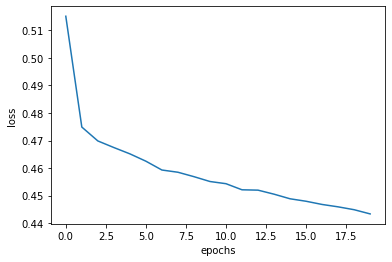

In [113]:
##Training parameters
batch_size_c = 100
epochs_c = 20

##Training
history_c = classifier.fit(xtrainSF_N, ytrain_c, batch_size_c, epochs_c, verbose=1)
plt.plot(history_c.history['loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

### 5.3 Pre-processing (2)

In [114]:
ytrain_r = ytrain_p.copy()
ytrain_r = ytrain_r[ytrain_r['Ground_truth'] > 0]
ytrain_r.drop(['Id'], axis=1, inplace=True)

In [115]:
xtrainSF_N_r = xtrainSF_N[xtrainSF_N.index.isin(ytrain_r.index)]

In [116]:
xtrainSF_N_r.reset_index(drop=True, inplace=True)
ytrain_r.reset_index(drop=True, inplace=True)

### 5.4 Train regressor

In [117]:
##Parameters of the regressor
n_variables_r = xtrainSF_N_r.shape[1]
n_layers_r = 20
n_neurons_r = 32

##Initialize regressor
regressor = Regressor_1(n_variables_r, n_layers_r, n_neurons_r)
regressor.summary()

Model: "Regressor_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_640 (Dense)            (None, 32)                448       
_________________________________________________________________
dense_641 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_642 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_643 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_644 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_645 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_646 (Dense)            (None, 32)                

Epoch 1/20
486/486 [==============================] - 4s 4ms/step - loss: 2.3583 - accuracy: 0.0181
Epoch 2/20
486/486 [==============================] - 2s 3ms/step - loss: 1.8824 - accuracy: 0.0229
Epoch 3/20
486/486 [==============================] - 2s 3ms/step - loss: 1.8532 - accuracy: 0.0235
Epoch 4/20
486/486 [==============================] - 2s 3ms/step - loss: 1.8452 - accuracy: 0.0226
Epoch 5/20
486/486 [==============================] - 2s 3ms/step - loss: 1.8457 - accuracy: 0.0241
Epoch 6/20
486/486 [==============================] - 2s 3ms/step - loss: 1.7994 - accuracy: 0.0233
Epoch 7/20
486/486 [==============================] - 2s 5ms/step - loss: 1.8040 - accuracy: 0.0232
Epoch 8/20
486/486 [==============================] - 1s 3ms/step - loss: 1.7960 - accuracy: 0.0257
Epoch 9/20
486/486 [==============================] - 2s 3ms/step - loss: 1.7779 - accuracy: 0.0238
Epoch 10/20
486/486 [==============================] - 2s 3ms/step - loss: 1.7634 - accuracy: 0.0241

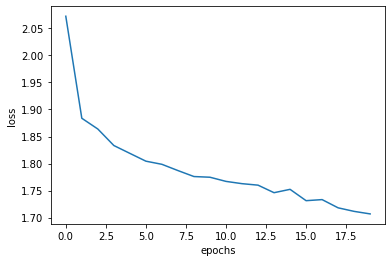

In [118]:
##Training parameters
batch_size_r = 100
epochs_r = 20

##Training
history_r = regressor.fit(xtrainSF_N_r, ytrain_r, batch_size_r, epochs_r, verbose=1)
plt.plot(history_r.history['loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## <font color = 'royalblue'>6 Prediction</font>

### 6.1 Predict 'rain or not'

In [119]:
ypred_c = classifier.predict(xtestSF_N)
ypred_c = (ypred_c > 0.5).astype(int)
ypred_c = pd.DataFrame(ypred_c, columns=['Rain'])

In [120]:
norain = ypred_c[ypred_c['Rain'] == 0]
rain = ypred_c[ypred_c['Rain'] == 1]

### 6.2 Set 'no rain' predictions

In [121]:
ClassifReg_predictions = bl_obsT.copy()
ClassifReg_predictions.loc[ClassifReg_predictions.index.isin(norain.index), 'Prediction'] = 0

### 6.3 Pre-processing

In [122]:
xtestSF_N_r = xtestSF_N[xtestSF_N.index.isin(rain.index)]

### 6.4 Predict 'rain' values

In [123]:
ypred_r = regressor.predict(xtestSF_N_r)

In [124]:
ClassifReg_predictions.loc[ClassifReg_predictions.index.isin(rain.index), 'Prediction'] = ypred_r

In [125]:
display(ClassifReg_predictions)

,Id,Prediction
0,14066001_149,0.663206
1,14126001_149,0.196431
2,14137001_149,0.203176
3,14216001_149,0.196431
4,14296001_149,0.000000
...,...,...
85135,86137003_293,0.000000
85136,86165005_293,0.000000
85137,86273001_293,0.000000
85138,91200002_293,0.000000


## <font color = 'royalblue'>7 Post-processing</font>

In [126]:
ClassifReg_predictions['Prediction'] = ClassifReg_predictions['Prediction'] + 1
display(ClassifReg_predictions)
print('Missing Data :', ClassifReg_predictions.isna().sum().sum(), '\n', 'Shape is :', ClassifReg_predictions.shape)

,Id,Prediction
0,14066001_149,1.663206
1,14126001_149,1.196431
2,14137001_149,1.203176
3,14216001_149,1.196431
4,14296001_149,1.000000
...,...,...
85135,86137003_293,1.000000
85136,86165005_293,1.000000
85137,86273001_293,1.000000
85138,91200002_293,1.000000


Missing Data : 0 
 Shape is : (85140, 2)


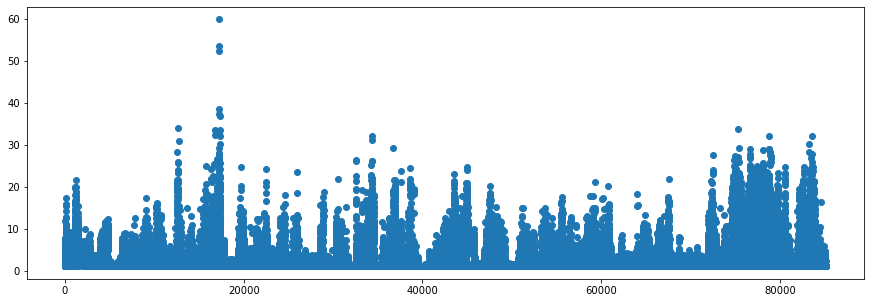

In [127]:
x = np.arange(0, 85140)
plt.figure(figsize=(15,5))
plt.scatter(x, ClassifReg_predictions['Prediction'])
plt.show()

## <font color = 'royalblue'>8 Exportation</font>

In [128]:
output_file = "Submissions_24_classifreg-bl-forecast-bis.csv"
ClassifReg_predictions.to_csv('/Users/qdouzery/Desktop/Defi-IA-2022_DGM/Submissions/' + output_file, index=False)
#ClassifReg_predictions.to_csv('/home/douzery/Bureau/Defi-IA-2022_DGM/Submissions/' + output_file, index=False)

#output_file = "Submissions_13_ann-20x32-month-mae.csv"
#Network_predictions.to_csv('C:/Users/Alexia/Desktop/5A/Defi-IA-2022_DGM/Submissions' + output_file, index=False)

## Autres

### 6.2 Monte Carlo validation

In [ ]:
#seuil = 0.5
#seuil = 2
B = 10
MAPE_ = np.zeros(B)

for b in tqdm(range(B)):
    xtrain_t, xtrain_v, ytrain_t, ytrain_v = Create_samples(xtrainS_aux, ytrain_aux)
    
    #dummies dataframes for "month" before normalization
    xtrain_t_Dum = pd.get_dummies(xtrain_t['month'])
    xtrain_v_Dum = pd.get_dummies(xtrain_v['month'])
    del xtrain_t_Dum[1]
    del xtrain_v_Dum[1]
    
    #normalization
    xtrain_t_N, xtrain_v_N = normalization(xtrain_t, xtrain_v)
    
    #drop "month" 
    xtrain_t_N.drop(['month'], axis=1, inplace=True)
    xtrain_v_N.drop(['month'], axis=1, inplace=True)
    
    #concatenation after normalization: dummies + original df
    xtrain_t_N = pd.concat([xtrain_t_N, xtrain_t_Dum],axis=1)
    xtrain_v_N = pd.concat([xtrain_v_N, xtrain_v_Dum],axis=1)

    ytrain_v.loc[:,'Ground_truth'] = ytrain_v.loc[:,'Ground_truth'] + 1
    
    nb_variables = np.shape(xtrain_t_N)[1]
    nn = get_model(nb_variables, n_layers, n_neurons)
    
    #Entraînement
    history = nn.fit(xtrain_t_N, ytrain_t, batch_size, epochs, verbose=0)
    
    validation = nn.predict(xtrain_v_N)
    Network_validation = ytrain_v.copy()
    Network_validation['Ground_truth'] = validation
    Network_validation.rename(columns={'Ground_truth':'Prediction'}, inplace=True)

    Network_validation.loc[:,'Prediction'] = Network_validation.loc[:,'Prediction'] + 1
    
    MAPE_[b] = MAPE(Network_validation['Prediction'], ytrain_v['Ground_truth'])

In [ ]:
print("Mean MAPE :", np.mean(MAPE_))
plt.boxplot(MAPE_)
plt.ylabel("MAPE")
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
#true_line = np.arange(min(ytrain_v['Ground_truth']),max(ytrain_v['Ground_truth'])+1)
true_line = np.arange(min(ytrain_v['Ground_truth']),6)
plt.scatter(ytrain_v['Ground_truth'], Network_validation['Prediction'])
plt.plot(true_line, true_line, color='r')
plt.xlim((0,6))
plt.ylim((0,6))
plt.xlabel("Ground truth")
plt.ylabel("Precipitation predictions")
plt.show()